In [88]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib.transforms as transforms
import numpy as np
from IPython.display import HTML 
%matplotlib inline

In [218]:
A = np.matrix([[0, 1],[-1,0]])
np.dot(A, [2,0]).tolist()[0]

[0, -2]

In [254]:
# SI Unit [m]
vehicle = {'length': 4.5, 'width': 1.68, 'height': 2.2}
lane = {'width': 3.5}
road = {'length': 100, 'laneNumber': 2}
m = 2 # margin
p0 = np.array([0, 0])
v0 = np.array([5, 0])
origin = np.array([m + 2, m + lane['width']*3/2])
dt = 1
size = np.array([vehicle['length'],vehicle['width']])

In [211]:
def init():
    xy = origin + np.dot(A, p0)
    print(xy[0][0])
    v = {
#         'feature': patches.Rectangle(xy=list(xy - size/2), 
#                                      width=vehicle['length'], height=vehicle['width'], 
#                                      fill=False, edgecolor='red'),
#         'label': plt.text(origin[0], origin[1], 'V1', ha='center', va='center'),
        'p': p0,
        'v': v0
    }
#     ax.add_patch(v['feature'])
    ax.add_patch(patches.Rectangle(xy=list(xy - size/2),
                                   width=vehicle['length'], height=vehicle['width'], 
                                   fill=False, edgecolor='red'))
    ax.text(origin[0], origin[1], 'V1', ha='center', va='center')

def animate(i):
    a = 0
    v['v'] += a*dt
    v['p'] += v['v']*dt
    xy = origin + np.dot(A, v['p'])
#     v['feature'].set_xy(list(xy- size/2))
#     v['label'].set_x(xy[0])
#     v['label'].set_y(xy[1])
    print(v['p'], v['v'], xy)
    ax.add_patch(patches.Rectangle(xy=list(xy - size/2),
                                   width=vehicle['length'], height=vehicle['width'], 
                                   fill=False, edgecolor='red'))
    ax.text(origin[0], origin[1], 'V1', ha='center', va='center')
    # ax.add_patch(v['feature'])

[0 0]
frame 0 p [5 0] xy [9.   7.25]
frame 0 p [10  0] xy [14.    7.25]
frame 1 p [15  0] xy [19.    7.25]
frame 2 p [20  0] xy [24.    7.25]
frame 3 p [25  0] xy [29.    7.25]
frame 4 p [30  0] xy [34.    7.25]


frame 0 p [35  0] xy [39.    7.25]


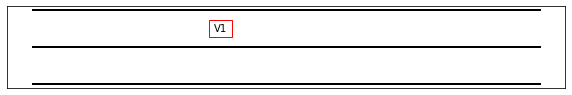

In [266]:
fig = plt.figure(figsize=(10, 1.5))
ax = plt.gca()

# Lanes
for i in range(road['laneNumber']+1):
    plt.plot([m, m+road['length']],
             [m+lane['width']*i,m+lane['width']*i], 
             color='black', linewidth=2)

# Ticks
plt.tick_params(axis='both', which='both', bottom=False, top=False,
               labelbottom=False, right=False, left=False, labelleft=False)

# ax.set_xlim(-m, road['length']+3*m)
# ax.set_ylim(0, road['laneNumber']*lane['width']+2*m)

art, = ax.plot([],[], marker='o', markersize=10)
txt = ax.text([],[], 'V1', ha='center', va='center')
rect =ax.add_patch(patches.Rectangle(xy=[0,0],width=vehicle['length'], height=vehicle['width'], 
                                   fill=False, edgecolor='red'))
p = p0 = np.array([0, 0])
print(p)

def update(i):
    global p
    p += v0 * dt
    xy = origin + [1,-1]* p
    print('frame', i, 'p',p,'xy', xy)
#     art.set_data(xy[0],xy[1])
    txt.set_x(xy[0])
    txt.set_y(xy[1])
    rect.set_xy(xy-size/2)
    

# init()
anim = animation.FuncAnimation(fig, update,
                               interval=100, frames=5, repeat=False)

HTML(anim.to_jshtml())

In [140]:
p0+2

array([2, 2])